# Изучение видов стекла
'''
Анализ зависимостей видов стекла от наличия тех или иных примесей
'''

In [1]:
from pandas import read_csv
data = read_csv('../input/glass.csv')
target="Type"
X = data.drop(target,1)
y = data[target]

In [2]:
from IPython.display import display
from scipy.stats import f_oneway, ttest_ind
from matplotlib import colors, legend, patches
from numpy import float32
from pandas import DataFrame
from seaborn import pointplot, boxplot, cubehelix_palette, set_style, kdeplot, color_palette, heatmap, diverging_palette
from matplotlib.pyplot import show, figure, rc_context, subplot, suptitle, title
from itertools import permutations
    
def display_ftest(data,category,numeric):
        f, p = f_oneway(*get_samples(data, category, numeric).values())
        display(DataFrame(data = {numeric:{"F score":f,"p-value":p}}).round(2).T)

def get_samples(data, category, numeric):
    samples = {}
    for c in data[category].unique():
        key = category + "_" + str(c)
        series = data[data[category] == c][numeric]
        samples[key] = series.rename(str(c))
    return samples
        
#===============================================================================================================================

def display_multi_category_x_numeric_analysis(data, category, numeric):

    subcategory_count = len(data[category].unique())
    chosen_palette = color_palette("colorblind",subcategory_count, desat=0.85)
    set_style("whitegrid")

    figure(figsize=(12.5,12.5))
    suptitle(numeric, fontsize=24)

    order = data.groupby(category)[numeric].mean().sort_values(ascending=False).index
    
#===============================================================================================================================
    
    with rc_context({'lines.linewidth': 0.8}):
        
        subplot(221)
        point_plot = pointplot(x=category, y=numeric, order=order, data=data, capsize=.14, color="#383838")
        point_plot.set_ylabel(numeric + " mean")
        point_plot.set_xlabel(point_plot.get_xlabel(), visible=False)
        point_plot.set_xticklabels(point_plot.get_xticklabels())

#===============================================================================================================================

        subplot(222)
        
        box_plot = boxplot(x=category, y=numeric, order=order, palette = chosen_palette, data=data)
        box_plot.set_xlabel(box_plot.get_xlabel, visible=False)
        box_plot.set_ylabel(numeric + " (mg)")
        box_plot.set_xticklabels(box_plot.get_xticklabels())
        
#===============================================================================================================================

        samples = get_samples(data, category, numeric)
        subplot(223)
        i = iter(chosen_palette)
        for key in [label.get_text() for label in box_plot.get_xticklabels()]:
            kde_plot = kdeplot(samples[category + "_" + str(key)], color=next(i), shade=True, linewidth=1.5)
            
#===============================================================================================================================

        subplot(224)

        p = diverging_palette(10, 220, sep=80, n=10)
        myColors = [p[5],p[8]]
        cmap = colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
        
        p_value_table = DataFrame(index = samples.keys(), columns = samples.keys())
    
        from scipy.stats import ttest_ind

        def is_statistically_significant(p):

            if p < 0.05:
                return 1
            else:
                return 0
        
        for c1,c2 in permutations(samples.keys(),2):
                    
            t,p = ttest_ind(samples[c1],samples[c2])
            p_value_table[c1][c2] = is_statistically_significant(p)
            
        heat_map = heatmap(p_value_table.fillna(float32(None)), linewidths=2, cmap=cmap, cbar=False, square=True)
        title("p-value Grid", fontsize=14)

        classes = ['p >= 0.05', 'p < 0.05']
        recs = []
        for i in range(0,len(myColors)):
            recs.append(patches.Rectangle((0,0),1,1,fc=myColors[i]))
        heat_map.legend(recs, classes, loc=4, bbox_to_anchor=(1, 1))
        
#===============================================================================================================================
        
        show()
    
        if len(data[category].unique()) > 2:
            display_ftest(data,category,numeric)
            
#===============================================================================================================================

In [3]:
i = iter(X.columns)

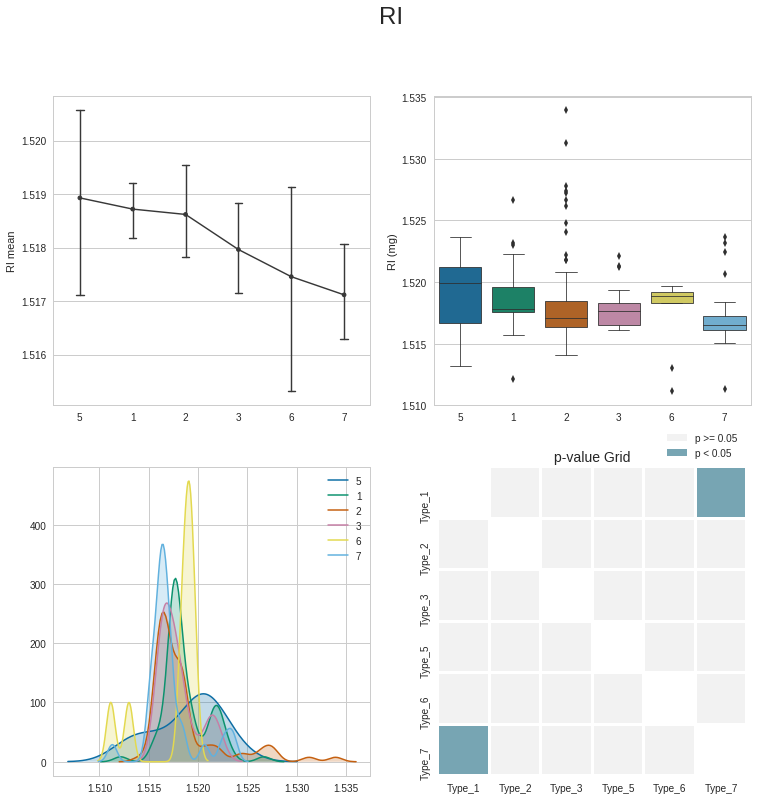

,F score,p-value
RI,1.61,0.16


In [4]:
display_multi_category_x_numeric_analysis(data,target,next(i))

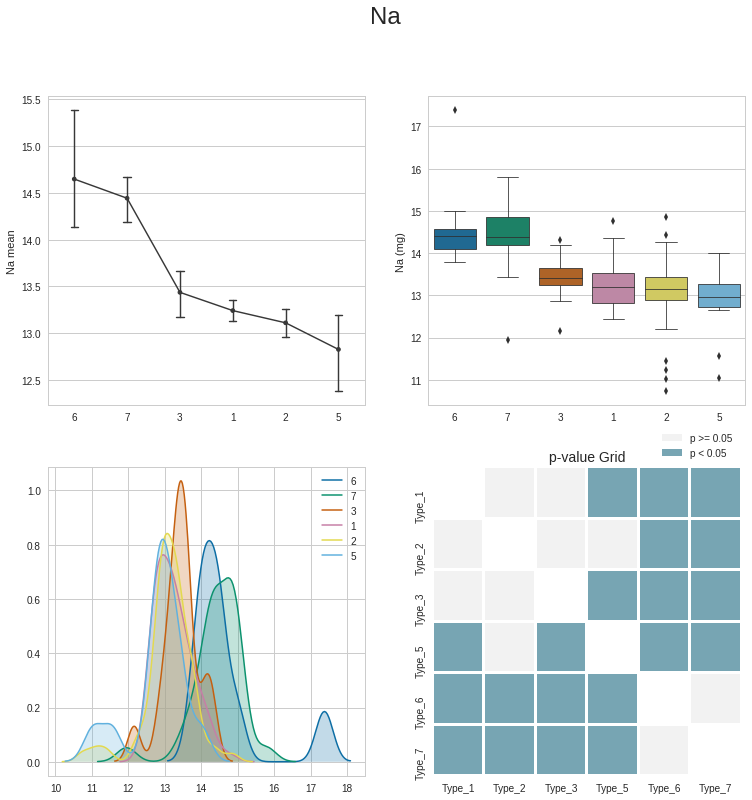

,F score,p-value
Na,28.55,0.0


In [5]:
display_multi_category_x_numeric_analysis(data,target,next(i))

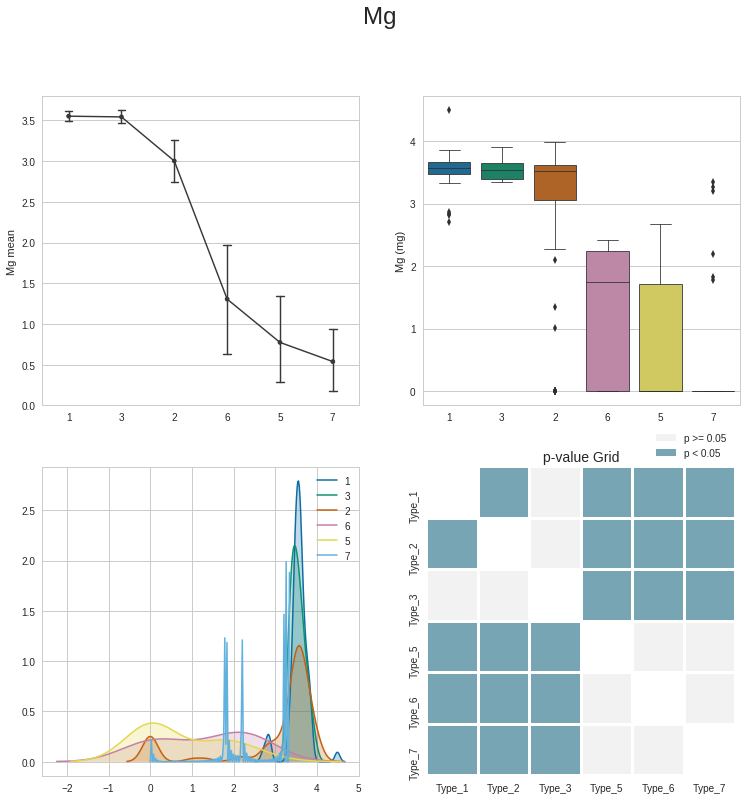

,F score,p-value
Mg,65.54,0.0


In [6]:
display_multi_category_x_numeric_analysis(data,target,next(i))

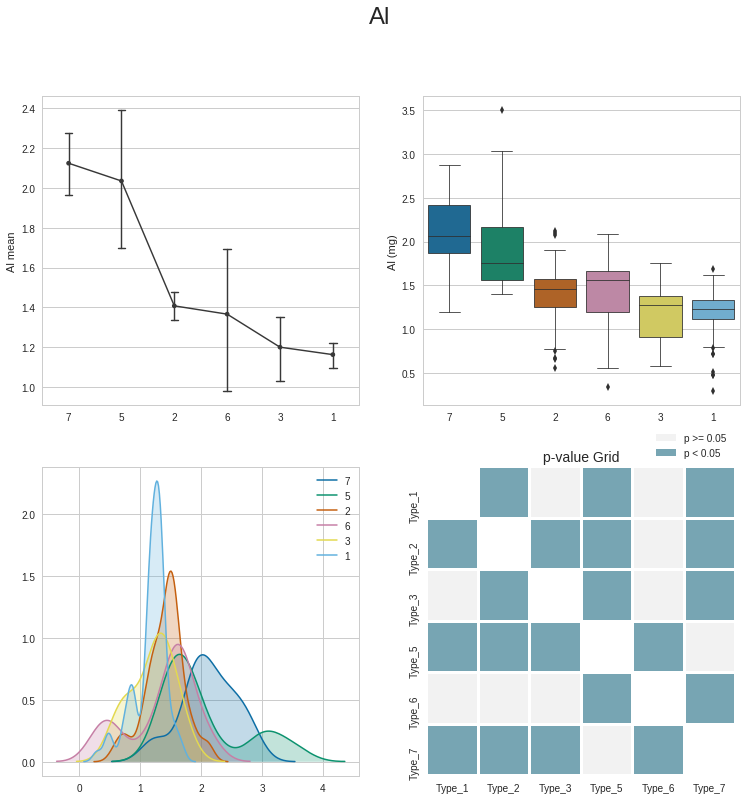

,F score,p-value
Al,35.73,0.0


In [7]:
display_multi_category_x_numeric_analysis(data,target,next(i))

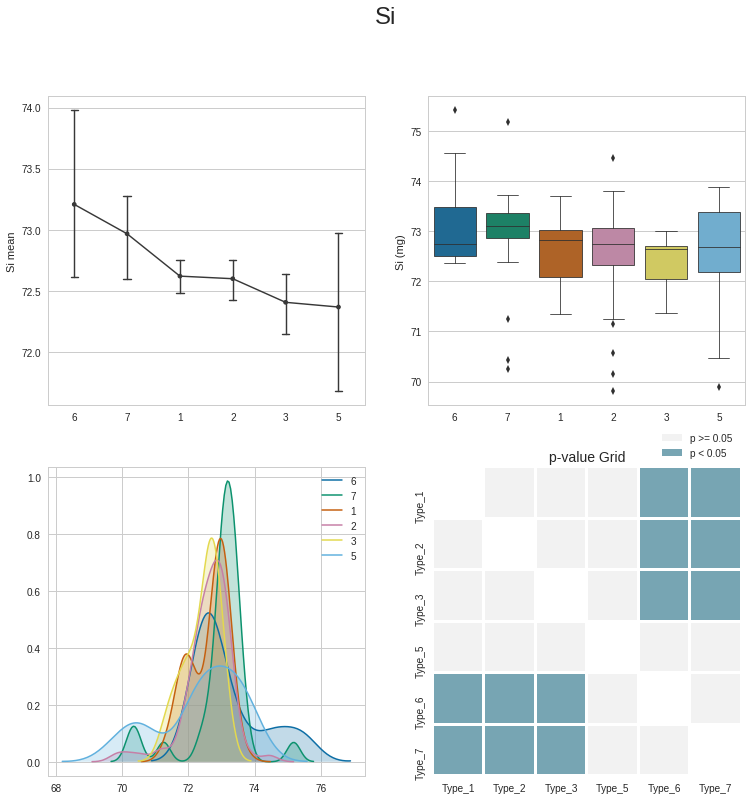

,F score,p-value
Si,2.79,0.02


In [8]:
display_multi_category_x_numeric_analysis(data,target,next(i))

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


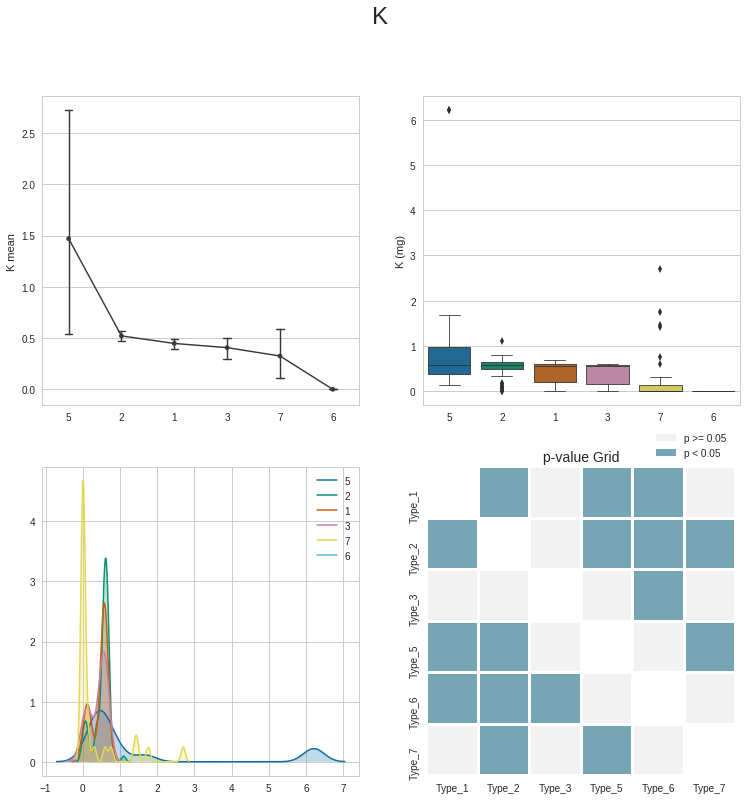

,F score,p-value
K,8.75,0.0


In [9]:
display_multi_category_x_numeric_analysis(data,target,next(i))

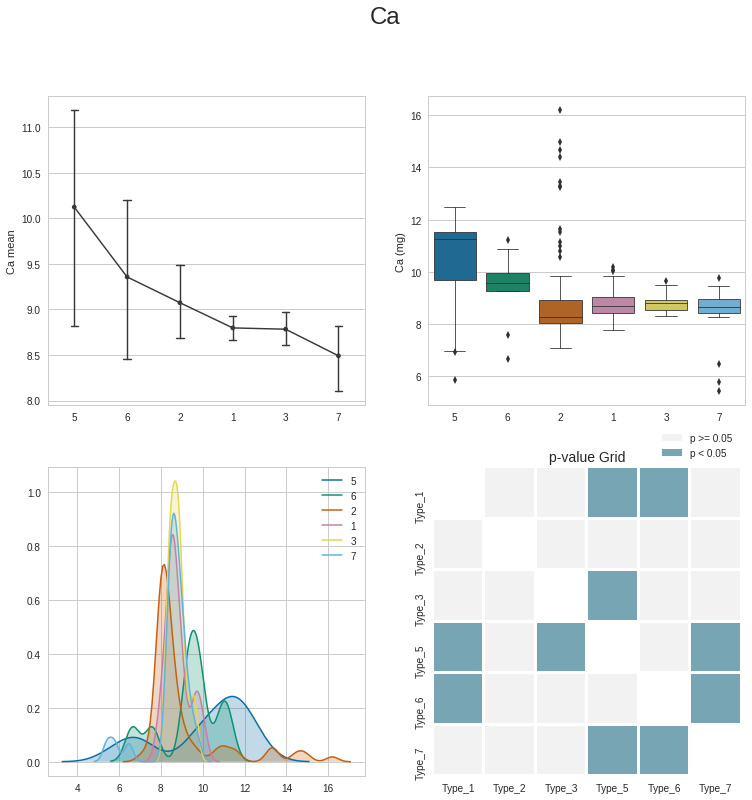

,F score,p-value
Ca,2.97,0.01


In [10]:
display_multi_category_x_numeric_analysis(data,target,next(i))

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


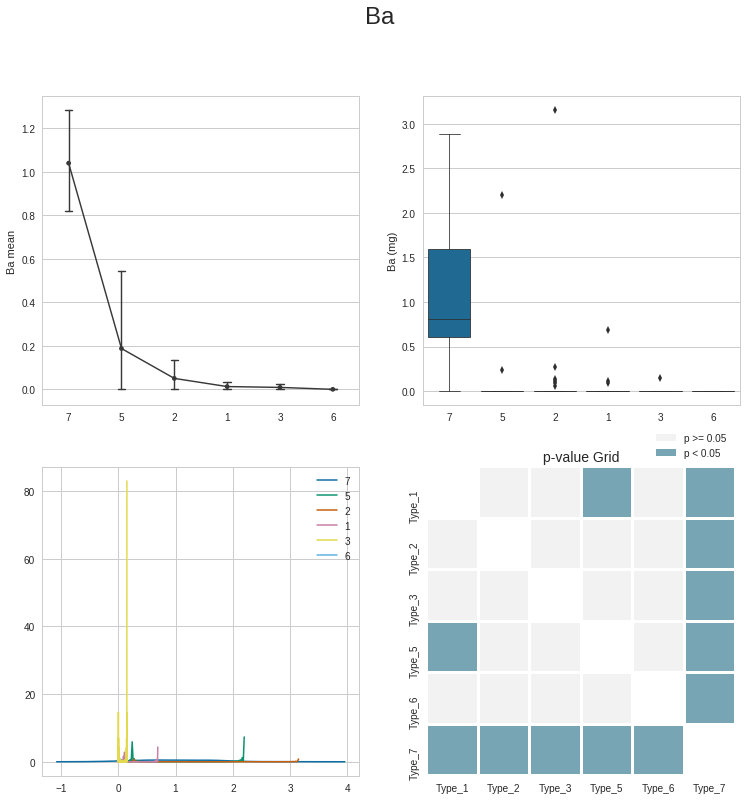

,F score,p-value
Ba,38.97,0.0


In [11]:
display_multi_category_x_numeric_analysis(data,target,next(i))

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


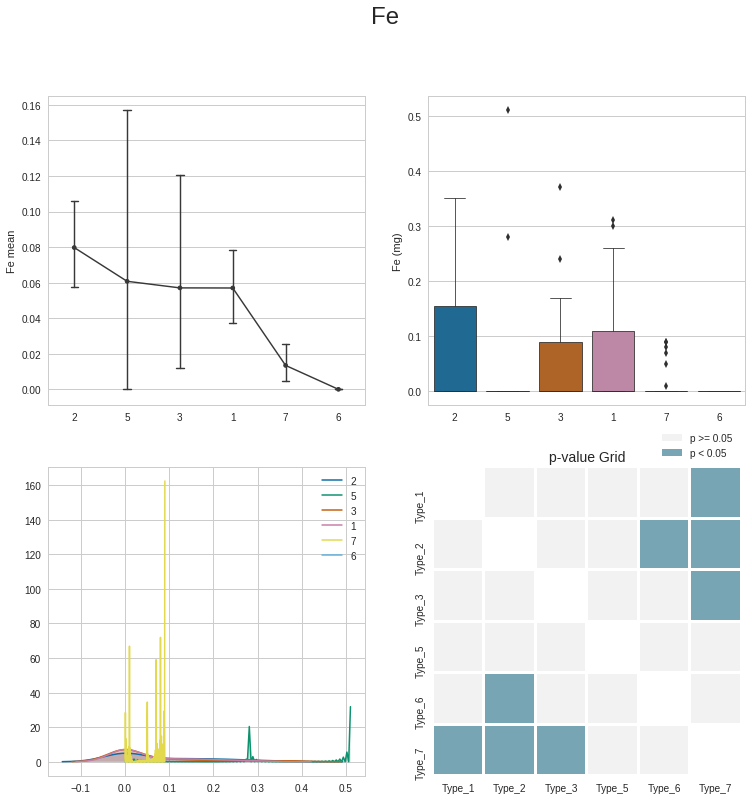

,F score,p-value
Fe,2.71,0.02


In [12]:
display_multi_category_x_numeric_analysis(data,target,next(i))